In [8]:
!pip install pandas scikit-learn folium matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import IFrame

In [9]:
df = pd.read_csv('UK_Accident data set.csv')

In [10]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,Yes,E01002849,2005.0
1,1,200501BS00002,524170.0,181650,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002909,2005.0
2,2,200501BS00003,524520.0,182240,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002857,2005.0
3,3,200501BS00004,526900.0,177530,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01002840,2005.0
4,4,200501BS00005,528060.0,179040,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1.0,Yes,E01002863,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31951,31951,200504DL05004,352580.0,430100,-2.720861,53.765076,4,3,2,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1.0,Yes,E01025232,2005.0
31952,31952,200504DL05005,351220.0,429820,-2.741446,53.762434,4,3,2,3,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01025288,2005.0
31953,31953,200504DL05006,352780.0,432010,-2.718120,53.782261,4,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01025241,2005.0
31954,31954,200504DL05007,353100.0,432900,-2.713399,53.790289,4,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01025256,2005.0


In [11]:
selected_columns = df[['Number_of_Vehicles', 'Number_of_Casualties', 'Road_Surface_Conditions', 'Weather_Conditions']]

In [12]:
selected_columns_cleaned = selected_columns.dropna()

In [13]:
print("\nSelected Columns After Cleaning:")
print(selected_columns_cleaned.head())


Selected Columns After Cleaning:
   Number_of_Vehicles  Number_of_Casualties Road_Surface_Conditions  \
0                   1                     1                Wet/Damp   
1                   1                     1                     Dry   
2                   2                     1                     Dry   
3                   1                     1                     Dry   
4                   1                     1                Wet/Damp   

           Weather_Conditions  
0  Raining without high winds  
1     Fine without high winds  
2     Fine without high winds  
3     Fine without high winds  
4     Fine without high winds  


In [14]:
null_values = selected_columns.isnull().sum()

In [15]:
print("Null Values in Selected Columns:")
print(null_values)

Null Values in Selected Columns:
Number_of_Vehicles         0
Number_of_Casualties       0
Road_Surface_Conditions    1
Weather_Conditions         1
dtype: int64


In [16]:
duplicates = selected_columns[selected_columns.duplicated(keep=False)]
# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       Number_of_Vehicles  Number_of_Casualties Road_Surface_Conditions  \
0                       1                     1                Wet/Damp   
1                       1                     1                     Dry   
2                       2                     1                     Dry   
3                       1                     1                     Dry   
4                       1                     1                Wet/Damp   
...                   ...                   ...                     ...   
31950                   2                     1                     Dry   
31951                   2                     1                Wet/Damp   
31952                   2                     3                     Dry   
31953                   2                     1                     Dry   
31954                   2                     1                     Dry   

               Weather_Conditions  
0      Raining without high winds  
1         F

In [17]:
selected_columns_reduced = selected_columns.head(100)

In [18]:
print(selected_columns_reduced)

    Number_of_Vehicles  Number_of_Casualties Road_Surface_Conditions  \
0                    1                     1                Wet/Damp   
1                    1                     1                     Dry   
2                    2                     1                     Dry   
3                    1                     1                     Dry   
4                    1                     1                Wet/Damp   
..                 ...                   ...                     ...   
95                   2                     1                     Dry   
96                   2                     1                     Dry   
97                   3                     1                     Dry   
98                   3                     2                     Dry   
99                   1                     1                Wet/Damp   

            Weather_Conditions  
0   Raining without high winds  
1      Fine without high winds  
2      Fine without high winds  
3  

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'Road_Surface_Conditions' is your target variable
X = selected_columns_reduced[['Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions']]
y = selected_columns_reduced['Road_Surface_Conditions']

# Preprocess data (e.g., one-hot encode categorical variables)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8


Confusion matrix for Logistic Regression model:
 [[ 6  0  1]
 [ 1  0  0]
 [ 2  0 10]]


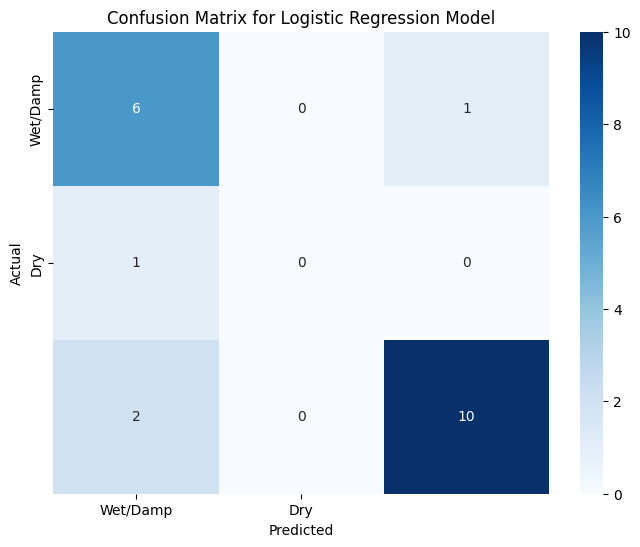

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Road_Surface_Conditions' has two classes: 'Slight' and 'Serious'
labels = ['Wet/Damp', 'Dry']  # Adjust these labels according to your actual classes

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix for Logistic Regression model:\n', conf_mat)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


In [26]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables for both training and testing sets
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_trainl_encoded = pd.DataFrame(encoder.fit_transform(X_trainl), columns=encoder.get_feature_names_out(X_trainl.columns))
X_testl_encoded = pd.DataFrame(encoder.transform(X_testl), columns=encoder.get_feature_names_out(X_testl.columns))

# Initialize and train a logistic regression model
logreg = LogisticRegression().fit(X_trainl_encoded, y_trainl)

# Make predictions on the test set
y_predl = logreg.predict(X_testl_encoded)

# Calculate accuracy
accuracy2 = logreg.score(X_testl_encoded, y_testl)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))



Accuracy: 85.00%


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
